# Simple LogisticRegression

Importing all tha necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns

Loading the csv file

In [2]:
df=pd.read_csv('diabetes2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Selecting 'Outcome' column for perdiction

In [4]:
x=df.drop('Outcome',axis=1)

In [5]:
y=df['Outcome']

In [6]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Checking Wether the data need any Preprocessing in this case no need for Preprocessing

Split the data in to train and test by using Random state 12

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

Load the LogisticRegression Model in to the Variable And fit the train set into the model

In [30]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

In [31]:
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Use the Model for Prediction by Using x_test set

In [32]:
logprediction=logmodel.predict(x_test)

In [33]:
logprediction

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

Find the accuracy of the Prediction you get

In [34]:
print(confusion_matrix(y_test,logprediction))
print(accuracy_score(y_test,logprediction)*100)

[[91  8]
 [20 35]]
81.81818181818183


Make a dataframe for grapical Representation

In [35]:
df2=pd.DataFrame({'Actual':y_test,'Prediction':logprediction})

In [36]:
df2.head()

,Actual,Prediction
229,0,0
235,1,1
750,1,1
365,0,0
449,0,0


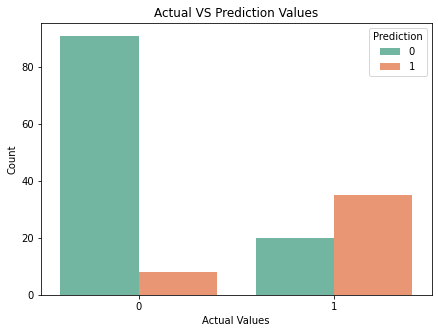

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(data=df2,x='Actual',hue='Prediction',palette='Set2')
plt.xlabel("Actual Values")
plt.ylabel("Count")
plt.title("Actual VS Prediction Values")
plt.legend(title="Prediction",loc="upper right")
plt.show()